Consider the general equation
\\[ -\mathrm{div}(A \ \mathrm{grad}(w)) + b \cdot \mathrm{grad}(w) + c\ w = 1. \\]

In [8]:
import numpy as np
import pandas as pd
import sys

sys.path.insert(1, "/Users/gpin/Repos/EVErrorEst/scripts")
from ngsolve import *

# from main_utils import *
from adapt import *
from ngsolve.webgui import Draw
import matplotlib.pyplot as plt

# Adaptivity

In [9]:
parameters = {
    "order": 2,
    "maxiter": 100,
    "maxndofs": 200_000,
    "center": 5 * np.pi**2 + 325,
    "radius": 10.0,
    "npts": 6,
    "nspan": 4,
    "maxh": 0.10,
    "theta": 0.75,
}

feast_parameters = {
    "hermitian": False,
    "stop_tol": 1.0e-10,
    "cut_tol": 1.0e-10,
    "eta_tol": 1e-10,
    "nrestarts": 5,
    "niterations": 100,
}

## System 1
Consider
\\[ \mathcal{L} w := -\Delta\ w + (20,30) \cdot \mathrm{grad}(w)  = 1,\\]
with a residual error estimator based on the landscape function.

It has the form
\\[\eta^2_K = \lVert -\Delta\ w + (20,30) \cdot \mathrm{grad}(w) - 1\rVert_K^2
    + \frac{1}{2} h_k \lVert \partial_\nu w \rVert_{\partial K}^2. \\]


In [10]:
matrix_coeff = CF((1.0, 0.0, 0.0, 1.0), dims=(2, 2))
vector_coeff = CF((20.0, 30.0))
scalar_coeff = CF(0.0)

mesh = Mesh(make_unit_square().GenerateMesh(maxh=MAXH))

eta_dict, eig_dict, err_dict, sol = test_ard(
    parameters=parameters,
    matrix_coeff=matrix_coeff,
    vector_coeff=vector_coeff,
    scalar_coeff=scalar_coeff,
    source_coeff=None,
    **feast_parameters,
)

	Parameters: {'order': 2, 'maxiter': 100, 'maxndofs': 200000, 'center': 374.3480220054468, 'radius': 10.0, 'npts': 6, 'nspan': 4, 'maxh': 0.1, 'theta': 0.75}

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.01, Center=374.348+0j

SpectralProjNG: Computing resolvents using umfpack
SpectralProjNG:   Factorizing at z = +374.355 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 -0.007j
SpectralProjNG:   Factorizing at z = +374.355 -0.007j

=========== Starting FEAST iterations ===========
Trying with 2 vectors:

 ITERATION 1 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [1.9e-16 3.8e-10]
   Real part of computed eigenvalues:
   [373.93664014 376.17301055]
   Imag part of computed eigenvalues:
   [-1.14895821e-13 -3.16204655e-09]
   Relative Hausdorff distance from prior iterate: 2.671e+97

 ITERATION 2 with 2 vectors and 2 left vectors
   During kernel cle

In [11]:
Draw(sol["u"], sol["mesh"], name="Landscape function")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [12]:
eta_df = pd.DataFrame(eta_dict)
eig_df = pd.DataFrame(eig_dict)
err_df = pd.DataFrame(err_dict)

<Axes: xlabel='ndofs'>

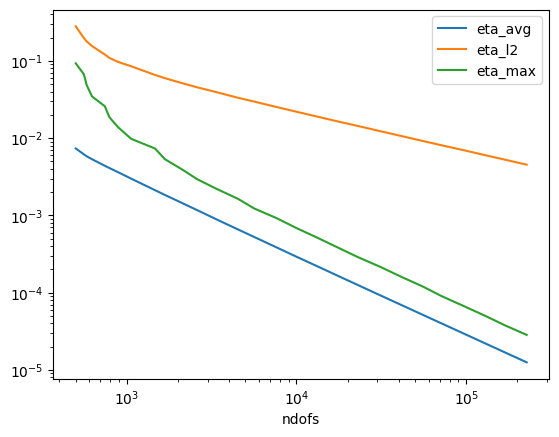

In [13]:
eta_df.plot(x="ndofs", loglog=True)

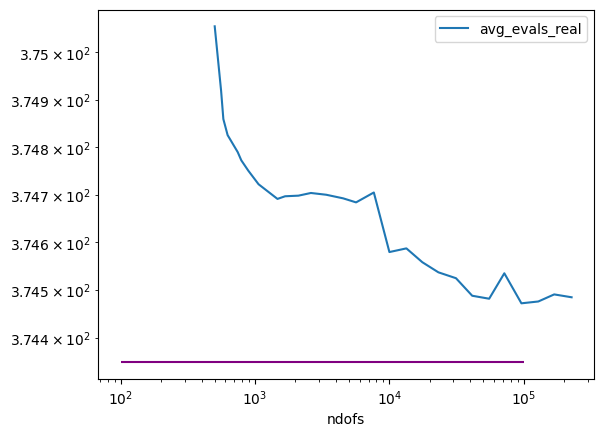

In [14]:
ax = eig_df.drop(["avg_evals", "avg_evals_imag"], axis=1).plot(x="ndofs", loglog=True)
ax.hlines(y=CENTER, xmin=100, xmax=100000, color="purple", label="test")

<Axes: xlabel='ndofs'>

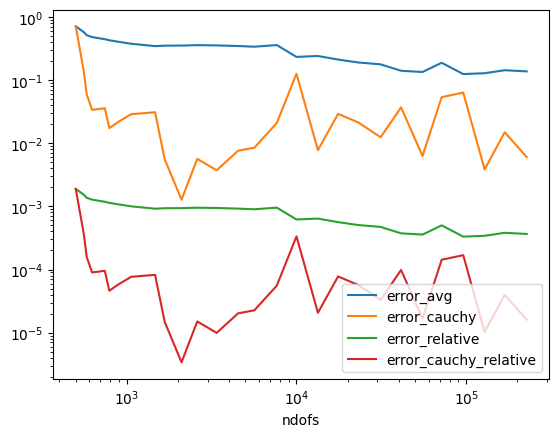

In [15]:
err_df.plot(x="ndofs", loglog=True)

## System 2

Consider
\\( \tilde {\mathcal{L}} w := \exp(-\phi) \mathcal{L} \exp{\phi}\\).
This is,
\\[ -\Delta\ w + \frac{20^2 + 30^2}{4} w  = 1,\\]
with a residual error estimator based on the landscape function.

It has the form
\\[\eta^2_K = \lVert -\Delta\ w + \frac{20^2 + 30^2}{4} w - 1\rVert_K^2
    + \frac{1}{2} \lVert \partial_\nu w \rVert_{\partial K}^2. \\]


In [16]:
matrix_coeff = CF((1.0, 0.0, 0.0, 1.0), dims=(2, 2))
vector_coeff = CF((0.0, 0.0))
scalar_coeff = CF(325.0)

mesh = Mesh(make_unit_square().GenerateMesh(maxh=MAXH))

eta_dict, eig_dict, err_dict, sol = test_ard(
    parameters=parameters,
    matrix_coeff=matrix_coeff,
    vector_coeff=vector_coeff,
    scalar_coeff=scalar_coeff,
    source_coeff=None,
    **feast_parameters,
)

	Parameters: {'order': 2, 'maxiter': 100, 'maxndofs': 200000, 'center': 374.3480220054468, 'radius': 10.0, 'npts': 6, 'nspan': 4, 'maxh': 0.1, 'theta': 0.75}

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.01, Center=374.348+0j

SpectralProjNG: Computing resolvents using umfpack
SpectralProjNG:   Factorizing at z = +374.355 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 -0.007j
SpectralProjNG:   Factorizing at z = +374.355 -0.007j

=========== Starting FEAST iterations ===========
Trying with 2 vectors:

 ITERATION 1 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [3.2e-05 6.8e-04]
   Real part of computed eigenvalues:
   [374.35759663 374.35851288]
   Relative Hausdorff distance from prior iterate: 2.671e+97

 ITERATION 2 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [3783.4  323.1]
   Real part of computed eigenvalues:
   [

In [17]:
Draw(sol["u"], sol["mesh"], name="Landscape function")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [18]:
to_file(eta_dict, "etas_mod_problem.csv")
to_file(eig_dict, "eval_mod_problem.csv")
to_file(err_dict, "errs_mod_problem.csv")
eta_df = pd.DataFrame(eta_dict)
eig_df = pd.DataFrame(eig_dict)
err_df = pd.DataFrame(err_dict)

<Axes: xlabel='ndofs'>

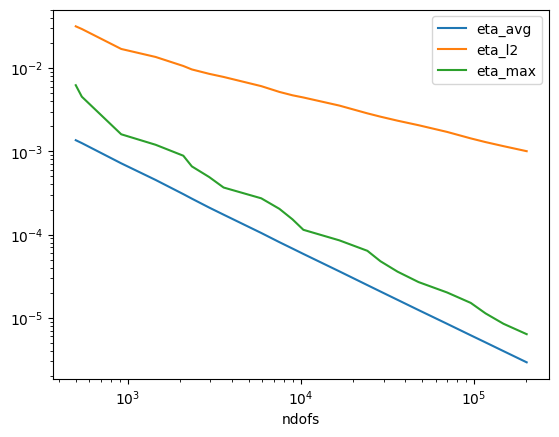

In [19]:
eta_df.plot(x="ndofs", loglog=True)

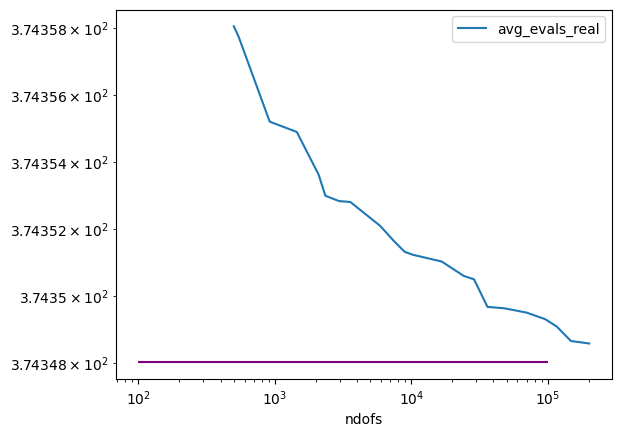

In [20]:
ax = eig_df.drop(["avg_evals", "avg_evals_imag"], axis=1).plot(x="ndofs", loglog=True)
ax.hlines(y=CENTER, xmin=100, xmax=100000, color="purple", label="test")

<Axes: xlabel='ndofs'>

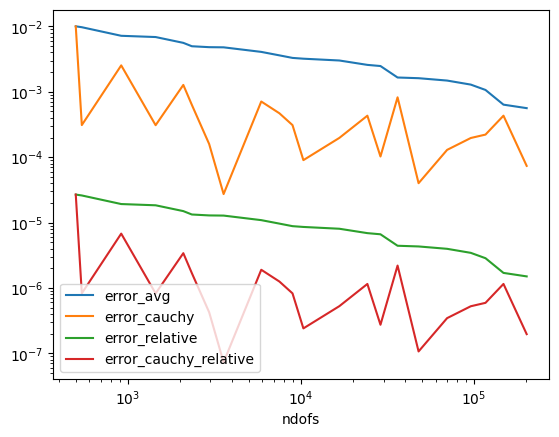

In [21]:
err_df.plot(
    x="ndofs",
    # y=err_df.columns.drop(['ndofs', 'error_cauchy', 'error_cauchy_relative']),
    loglog=True,
)

## System 3

### FEAST
Consider the eigenvalue problem
\\[ \mathcal{L} w := -\Delta\ w + (20,30) \cdot \mathrm{grad}(w)  = \lambda w,\\]
with a residual error estimator based on the eigenfunctions.

They have the form
\\[\eta^2_K(w_i, \lambda_i) = \lVert -\Delta\ w_i+ (20,30) \cdot \mathrm{grad}(w_i) - \lambda_i w_i\rVert_K^2
    + \frac{1}{2} \lVert \partial_\nu w \rVert_{\partial K}^2. \\]


In [22]:
matrix = CoefficientFunction((1, 0, 0, 1), dims=(2, 2))
vector = CoefficientFunction((20, 30))
scalar = CoefficientFunction(0.0)
mesh = Mesh(make_unit_square().GenerateMesh(maxh=MAXH))

eta_dict, eig_dict, err_dict, sol = test_ard_eig_feast(
    parameters=parameters,
    matrix_coeff=matrix_coeff,
    vector_coeff=vector_coeff,
    scalar_coeff=scalar_coeff,
    **feast_parameters,
)

	Parameters: {'order': 2, 'maxiter': 100, 'maxndofs': 200000, 'center': 374.3480220054468, 'radius': 10.0, 'npts': 6, 'nspan': 4, 'maxh': 0.1, 'theta': 0.75}

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.01, Center=374.348+0j

SpectralProjNG: Computing resolvents using umfpack
SpectralProjNG:   Factorizing at z = +374.355 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 -0.007j
SpectralProjNG:   Factorizing at z = +374.355 -0.007j

=========== Starting FEAST iterations ===========
Trying with 2 vectors:

 ITERATION 1 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [3.2e-05 6.8e-04]
   Real part of computed eigenvalues:
   [374.35759663 374.35851288]
   Relative Hausdorff distance from prior iterate: 2.671e+97

 ITERATION 2 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [3783.4  323.1]
   Real part of computed eigenvalues:
   [

In [23]:
Draw(sol["u"], sol["mesh"], name="Landscape solution")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [24]:
to_file(eta_dict, "etas_eig.csv")
to_file(eig_dict, "eval_eig.csv")
to_file(err_dict, "errs_eig.csv")
eta_df = pd.DataFrame(eta_dict)
eig_df = pd.DataFrame(eig_dict)
err_df = pd.DataFrame(err_dict)

<Axes: xlabel='ndofs'>

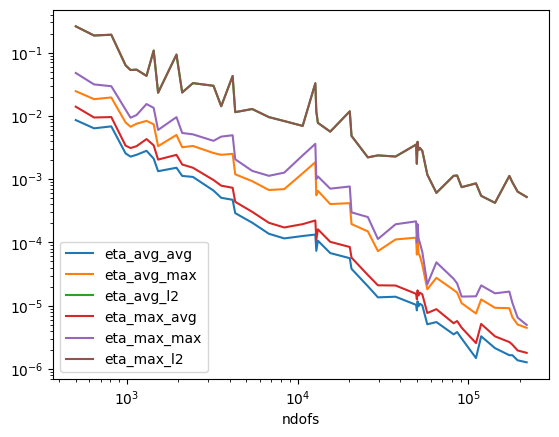

In [25]:
eta_df.plot(x="ndofs", loglog=True)

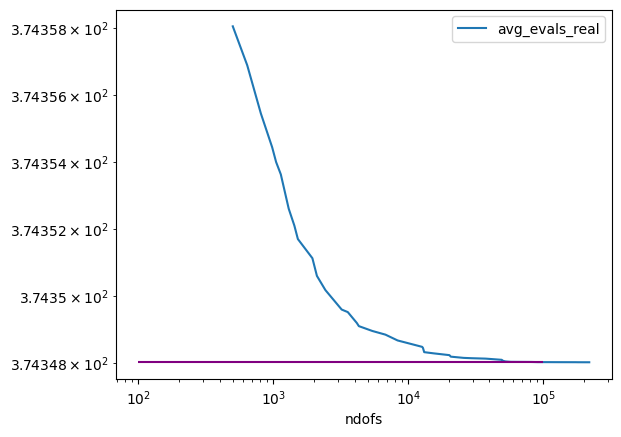

In [26]:
ax = eig_df.drop(["avg_evals", "avg_evals_imag"], axis=1).plot(x="ndofs", loglog=True)
ax.hlines(y=CENTER, xmin=100, xmax=100000, color="purple", label="test")

<Axes: xlabel='ndofs'>

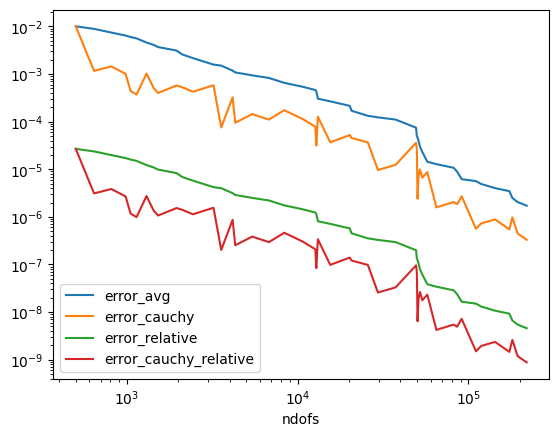

In [27]:
err_df.plot(x="ndofs", loglog=True)

### Arnoldi solver

We also use an Arnoldi type of solver.

In [28]:
matrix = CoefficientFunction((1, 0, 0, 1), dims=(2, 2))
vector = CoefficientFunction((20, 30))
scalar = CoefficientFunction(0.0)
mesh = Mesh(make_unit_square().GenerateMesh(maxh=MAXH))

eta_dict, eig_dict, err_dict, sol = test_ard_eig_arnoldi(
    parameters=parameters,
    matrix_coeff=matrix_coeff,
    vector_coeff=vector_coeff,
    scalar_coeff=scalar_coeff,
    # **kwargs,
)

	Parameters: {'order': 2, 'maxiter': 100, 'maxndofs': 200000, 'center': 374.3480220054468, 'radius': 10.0, 'npts': 6, 'nspan': 4, 'maxh': 0.1, 'theta': 0.75}


In [29]:
Draw(sol["u"], sol["mesh"], name="Landscape solution")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [30]:
to_file(eta_dict, "etas_eig_arnoldi.csv")
to_file(eig_dict, "eval_eig_arnoldi.csv")
to_file(err_dict, "errs_eig_arnoldi.csv")
eta_df = pd.DataFrame(eta_dict)
eig_df = pd.DataFrame(eig_dict)
err_df = pd.DataFrame(err_dict)

<Axes: xlabel='ndofs'>

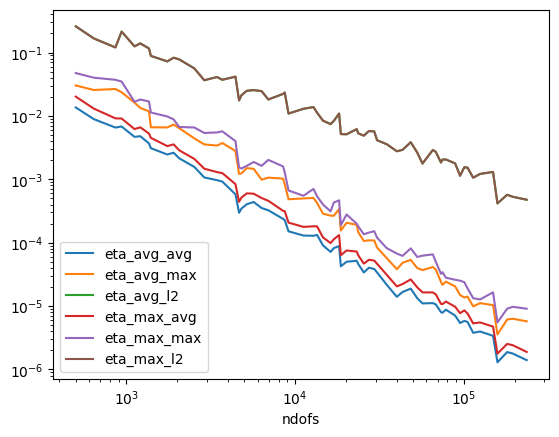

In [31]:
eta_df.plot(x="ndofs", loglog=True)

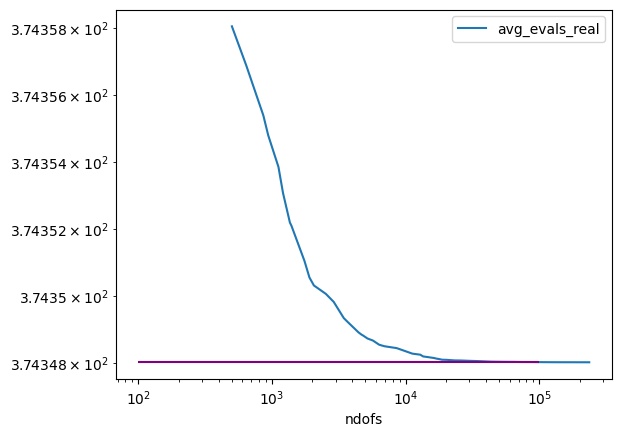

In [32]:
ax = eig_df.drop(["avg_evals", "avg_evals_imag"], axis=1).plot(x="ndofs", loglog=True)
ax.hlines(y=CENTER, xmin=100, xmax=100000, color="purple", label="test")

<Axes: xlabel='ndofs'>

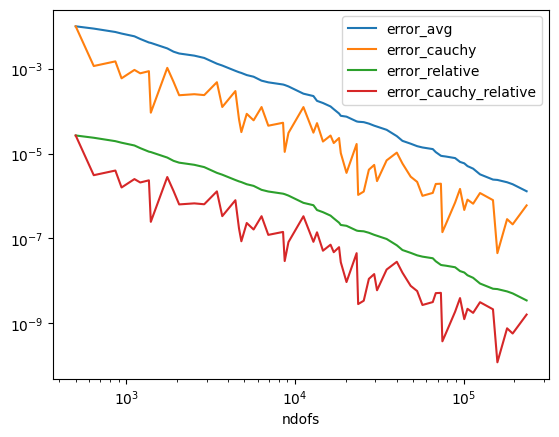

In [33]:
err_df.plot(x="ndofs", loglog=True)

## System 4
Consider the eigenvalue problem
\\[ \tilde{\mathcal{L}} w := -\Delta\ w + \frac{20^2 + 30^2}{4} w  = \lambda w,\\]
with a residual error estimator based on the eigenfunctions.

They have the form
\\[\eta^2_K(w_i, \lambda_i) = \lVert -\Delta\ w_i+  \frac{20^2 + 30^2}{4}w  - \lambda_i w_i\rVert_K^2
    + \frac{1}{2} \lVert \partial_\nu w \rVert_{\partial K}^2. \\]


In [34]:
matrix = CoefficientFunction((1, 0, 0, 1), dims=(2, 2))
vector = CoefficientFunction((0.0, 0.0))
scalar = CoefficientFunction(325.0)
mesh = Mesh(make_unit_square().GenerateMesh(maxh=MAXH))

eta_dict, eig_dict, err_dict, sol = test_ard_eig_feast(
    parameters=parameters,
    matrix_coeff=matrix_coeff,
    vector_coeff=vector_coeff,
    scalar_coeff=scalar_coeff,
    **feast_parameters
)

	Parameters: {'order': 2, 'maxiter': 100, 'maxndofs': 200000, 'center': 374.3480220054468, 'radius': 10.0, 'npts': 6, 'nspan': 4, 'maxh': 0.1, 'theta': 0.75}

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.01, Center=374.348+0j

SpectralProjNG: Computing resolvents using umfpack
SpectralProjNG:   Factorizing at z = +374.355 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 -0.007j
SpectralProjNG:   Factorizing at z = +374.355 -0.007j

=========== Starting FEAST iterations ===========
Trying with 2 vectors:

 ITERATION 1 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [3.2e-05 6.8e-04]
   Real part of computed eigenvalues:
   [374.35759663 374.35851288]
   Relative Hausdorff distance from prior iterate: 2.671e+97

 ITERATION 2 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [3783.4  323.1]
   Real part of computed eigenvalues:
   [

In [35]:
Draw(sol["u"], sol["mesh"], name="Landscape solution")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [36]:
to_file(eta_dict, "etas_eig_mod.csv")
to_file(eig_dict, "eval_eig_mod.csv")
to_file(err_dict, "errs_eig_mod.csv")
eta_df = pd.DataFrame(eta_dict)
eig_df = pd.DataFrame(eig_dict)
err_df = pd.DataFrame(err_dict)

<Axes: xlabel='ndofs'>

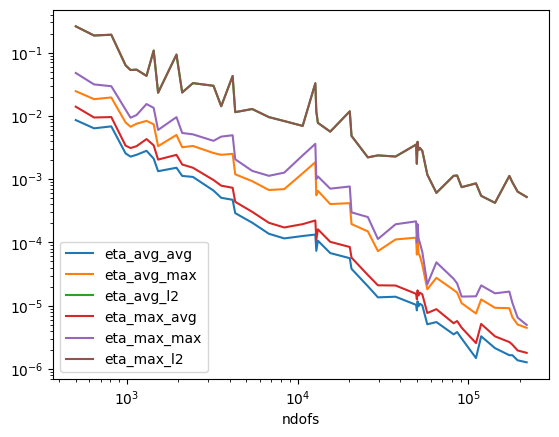

In [37]:
eta_df.plot(x="ndofs", loglog=True)

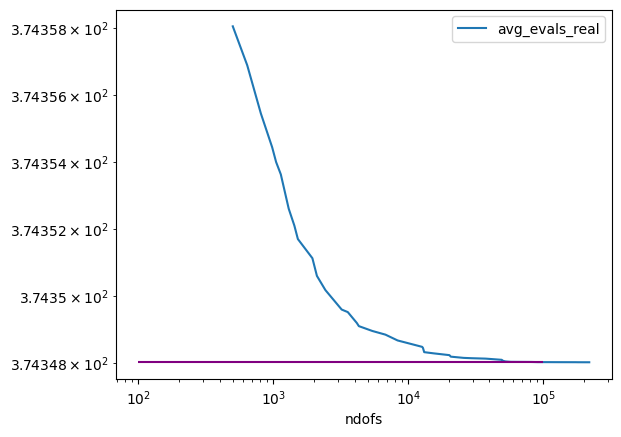

In [38]:
ax = eig_df.drop(["avg_evals", "avg_evals_imag"], axis=1).plot(x="ndofs", loglog=True)
ax.hlines(y=CENTER, xmin=100, xmax=100000, color="purple", label="test")

<Axes: xlabel='ndofs'>

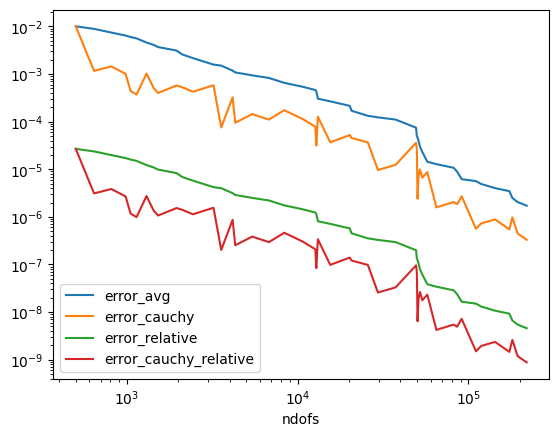

In [39]:
err_df.plot(x="ndofs", loglog=True)

### Arnoldi

In [40]:
matrix = CoefficientFunction((1, 0, 0, 1), dims=(2, 2))
vector = CoefficientFunction((0.0, 0.0))
scalar = CoefficientFunction(325.0)
mesh = Mesh(make_unit_square().GenerateMesh(maxh=MAXH))

eta_dict, eig_dict, err_dict, sol = test_ard_eig_arnoldi(
    parameters=parameters,
    matrix_coeff=matrix_coeff,
    vector_coeff=vector_coeff,
    scalar_coeff=scalar_coeff,
    # **kwargs,
)

	Parameters: {'order': 2, 'maxiter': 100, 'maxndofs': 200000, 'center': 374.3480220054468, 'radius': 10.0, 'npts': 6, 'nspan': 4, 'maxh': 0.1, 'theta': 0.75}


In [41]:
Draw(sol["u"], sol["mesh"], name="Landscape solution")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [42]:
to_file(eta_dict, "etas_eig_mod_arnoldi.csv")
to_file(eig_dict, "eval_eig_mod_arnoldi.csv")
to_file(err_dict, "errs_eig_mod_arnoldi.csv")
eta_df = pd.DataFrame(eta_dict)
eig_df = pd.DataFrame(eig_dict)
err_df = pd.DataFrame(err_dict)

<Axes: xlabel='ndofs'>

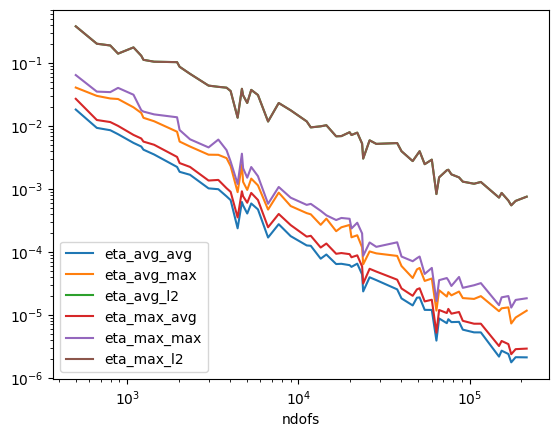

In [43]:
eta_df.plot(x="ndofs", loglog=True)

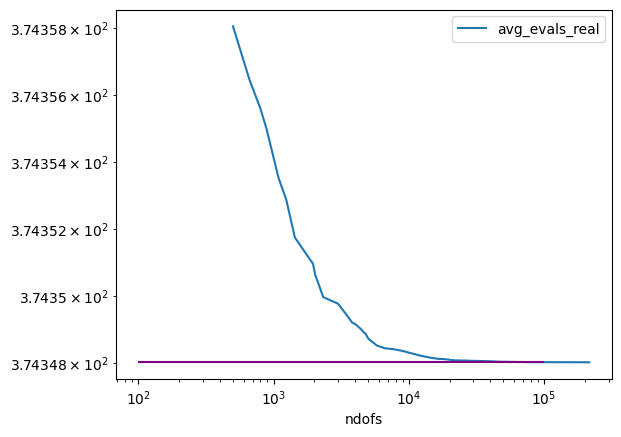

In [44]:
ax = eig_df.drop(["avg_evals", "avg_evals_imag"], axis=1).plot(x="ndofs", loglog=True)
ax.hlines(y=CENTER, xmin=100, xmax=100000, color="purple", label="test")

<Axes: xlabel='ndofs'>

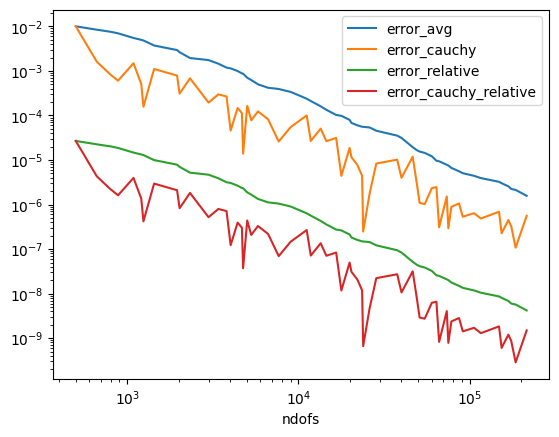

In [45]:
err_df.plot(x="ndofs", loglog=True)

In [46]:
matrix = CoefficientFunction((1, 0, 0, 1), dims=(2, 2))
vector = CoefficientFunction((0.0, 0.0))
scalar = CoefficientFunction(325.0)
mesh = Mesh(make_unit_square().GenerateMesh(maxh=MAXH))

eta_dict, eig_dict, err_dict, sol = test_ard_eig_feast_dual(
    parameters=parameters,
    matrix_coeff=matrix,
    vector_coeff=vector,
    scalar_coeff=scalar,
    **feast_parameters,
)

	Parameters: {'order': 2, 'maxiter': 100, 'maxndofs': 200000, 'center': 374.3480220054468, 'radius': 10.0, 'npts': 6, 'nspan': 4, 'maxh': 0.1, 'theta': 0.75}

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.01, Center=374.348+0j

SpectralProjNG: Computing resolvents using umfpack
SpectralProjNG:   Factorizing at z = +374.355 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 -0.007j
SpectralProjNG:   Factorizing at z = +374.355 -0.007j

=========== Starting FEAST iterations ===========
Trying with 2 vectors:

 ITERATION 1 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [3.2e-05 6.8e-04]
   Real part of computed eigenvalues:
   [374.35759663 374.35851288]
   Relative Hausdorff distance from prior iterate: 2.671e+97

 ITERATION 2 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [3783.4  323.1]
   Real part of computed eigenvalues:
   [

In [47]:
Draw(sol["u"], sol["mesh"], name="Landscape solution")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [48]:
to_file(eta_dict, "etas_eig_dual.csv")
to_file(eig_dict, "eval_eig_dual.csv")
to_file(err_dict, "errs_eig_dual.csv")
eta_df = pd.DataFrame(eta_dict)
eig_df = pd.DataFrame(eig_dict)
err_df = pd.DataFrame(err_dict)

<Axes: xlabel='ndofs'>

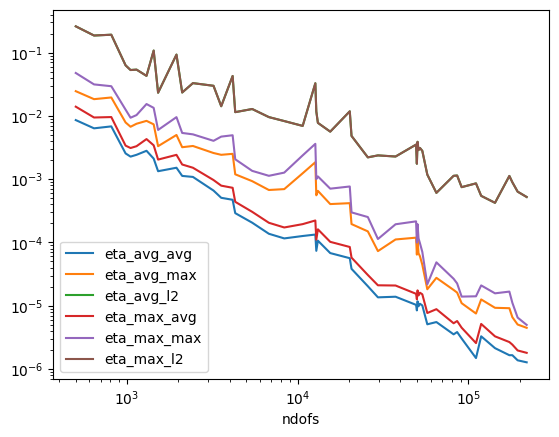

In [49]:
eta_df.plot(x="ndofs", loglog=True)

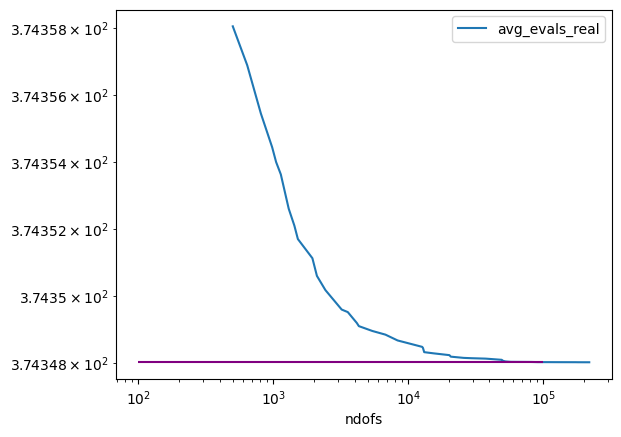

In [50]:
ax = eig_df.drop(["avg_evals", "avg_evals_imag"], axis=1).plot(x="ndofs", loglog=True)
ax.hlines(y=CENTER, xmin=100, xmax=100000, color="purple", label="test")

<Axes: xlabel='ndofs'>

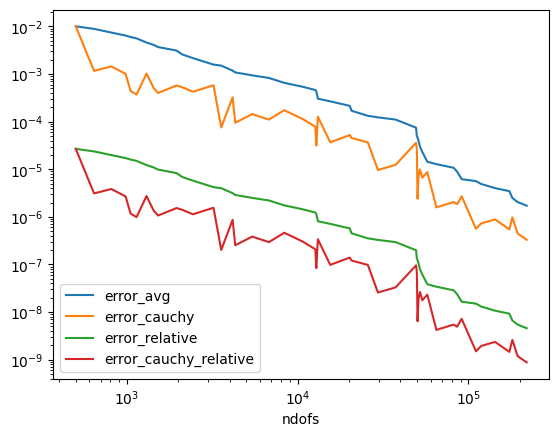

In [51]:
err_df.plot(x="ndofs", loglog=True)

In [52]:
matrix = CoefficientFunction((1, 0, 0, 1), dims=(2, 2))
vector = CoefficientFunction((20.0, 30.0))
scalar = CoefficientFunction(0.0)
mesh = Mesh(make_unit_square().GenerateMesh(maxh=MAXH))

eta_dict, eig_dict, err_dict, sol = test_ard_dual(
    parameters=parameters,
    matrix_coeff=matrix,
    vector_coeff=vector,
    scalar_coeff=scalar,
    source_coeff=None,
    **feast_parameters,
)

	Parameters: {'order': 2, 'maxiter': 100, 'maxndofs': 200000, 'center': 374.3480220054468, 'radius': 10.0, 'npts': 6, 'nspan': 4, 'maxh': 0.1, 'theta': 0.75}

SpectralProj: Setting shifted trapezoidal rule quadrature on circular contour
SpectralProj: Radius=0.01, Center=374.348+0j

SpectralProjNG: Computing resolvents using umfpack
SpectralProjNG:   Factorizing at z = +374.355 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 +0.007j
SpectralProjNG:   Factorizing at z = +374.341 -0.007j
SpectralProjNG:   Factorizing at z = +374.355 -0.007j

=========== Starting FEAST iterations ===========
Trying with 2 vectors:

 ITERATION 1 with 2 vectors and 2 left vectors
   During kernel cleaning abs(g):
   [1.9e-16 3.8e-10]
   Real part of computed eigenvalues:
   [373.93664014 376.17301055]
   Imag part of computed eigenvalues:
   [-1.14895821e-13 -3.16204655e-09]
   Relative Hausdorff distance from prior iterate: 2.671e+97

 ITERATION 2 with 2 vectors and 2 left vectors
   During kernel cle

In [53]:
Draw(sol["u"], sol["mesh"], name="Landscape solution")

WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

In [54]:
to_file(eta_dict, "etas_eig_dual.csv")
to_file(eig_dict, "eval_eig_dual.csv")
to_file(err_dict, "errs_eig_dual.csv")
eta_df = pd.DataFrame(eta_dict)
eig_df = pd.DataFrame(eig_dict)
err_df = pd.DataFrame(err_dict)

<Axes: xlabel='ndofs'>

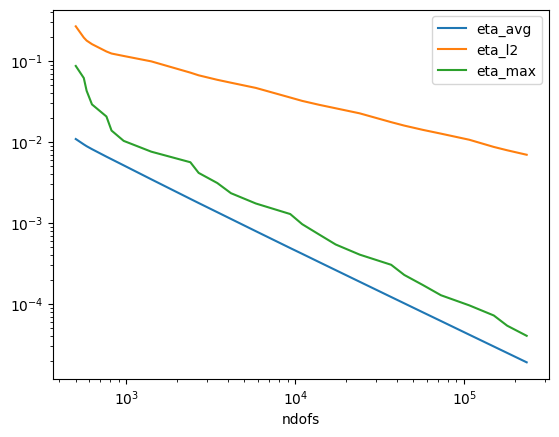

In [55]:
eta_df.plot(x="ndofs", loglog=True)

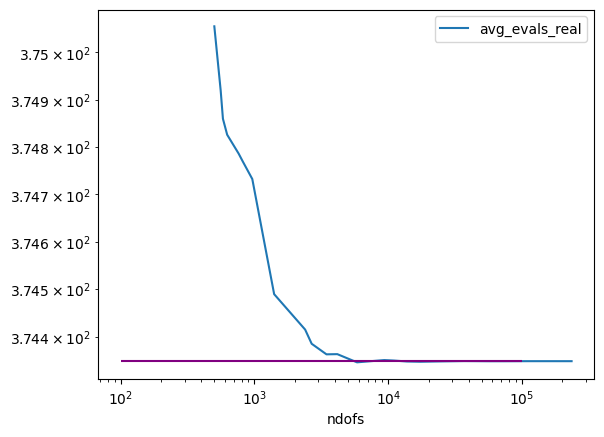

In [56]:
ax = eig_df.drop(["avg_evals", "avg_evals_imag"], axis=1).plot(x="ndofs", loglog=True)
ax.hlines(y=CENTER, xmin=100, xmax=100000, color="purple", label="test")

<Axes: xlabel='ndofs'>

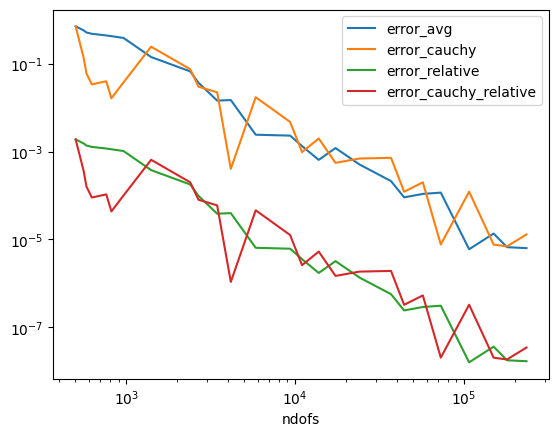

In [57]:
err_df.plot(x="ndofs", loglog=True)